<a href="https://colab.research.google.com/github/marcelossf/Aulas/blob/master/2_2_Random_Forest_para_Regress%C3%A3o_no_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote está instalado
# <> o símbolo % é para executar no bash
%pip show pycaret

In [ ]:
# <> ------------------------------------------------------
# <> Se o pacote não tiver instalado
# <> executar o comando abaixo
%pip install pycaret --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 646.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 654.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.5 MB/s eta 0:00:00
  

In [ ]:
# <> ------------------------------------------------------
# <> Verificando se o pacote foi instalado
%pip show pycaret

Name: pycaret
Version: 3.3.2
Summary: PyCaret - An open source, low-code machine learning library in Python.
Home-page: https://github.com/pycaret/pycaret
Author: Moez Ali
Author-email: moez.ali@queensu.ca
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: category-encoders, cloudpickle, deprecation, imbalanced-learn, importlib-metadata, ipython, ipywidgets, jinja2, joblib, kaleido, lightgbm, markupsafe, matplotlib, nbformat, numba, numpy, pandas, plotly, plotly-resampler, pmdarima, psutil, pyod, requests, schemdraw, scikit-learn, scikit-plot, scipy, sktime, statsmodels, tbats, tqdm, wurlitzer, xxhash, yellowbrick
Required-by: 


In [ ]:
# <> -----------------------------------------------------
# Lendo as bibliotecas necessárias

# <> -----------------------------
# <> Bibliotecas dos algoritmos
from pycaret.regression import *

# <> Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# <> Biliotecas para manipulação com dados
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
# <> ------------------------------------------------------
# <> Lendo um dataset de exemplo
# <> ------------------------------------------------------
url_dataset = 'https://storage.googleapis.com/subject-materials-databases/INTRODUCAO_A_CD/diamond_regressao/diamonds.csv' # url do dataset
#s_train = requests.get(url_train).content

diamond = pd.read_csv(url_dataset, sep=",") #dados_train

Link das variáveis: https://www.kaggle.com/code/heeraldedhia/regression-on-diamonds-dataset-95-score/input

In [ ]:
# <> ------------------------------------------------------
# <> Visualizando um Cabeçalho
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# <> ------------------------------------------------------
# <> Verificando se os tipos foram lidos corretamente
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
# <> ------------------------------------------------------
# <> Removendo colunas desnecessárias
diamond = diamond.drop(['Unnamed: 0'], axis=1)

In [ ]:
# <> ------------------------------------------------------
# <> Dividindo em treino e teste
diamond_train, diamond_test = train_test_split(diamond,test_size=.3, random_state=123)

In [ ]:
# <> Iniciando  a configuração do modelo
# <> e informando a variável resposta
# <> session_id => para reprodutibilidade
arvore_setup = setup(data = diamond_train, target = 'price', session_id = 12345)

,Description,Value
0,Session id,12345
1,Target,price
2,Target type,Regression
3,Original data shape,"(37758, 10)"
4,Transformed data shape,"(37758, 27)"
5,Transformed train set shape,"(26430, 27)"
6,Transformed test set shape,"(11328, 27)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


In [ ]:
# <> -----------------------------
# <> Modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# <> -----------------------------
# <> Criação do Modelo com random Forest para Regressão
regression_rf_model = create_model('rf', n_estimators = 100, max_depth = 3, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,756.5885,1710736.5569,1307.9513,0.8925,0.2667,0.2219
1,764.7625,1821976.3189,1349.8060,0.8829,0.2672,0.2256
2,785.4998,1875091.8883,1369.3399,0.8788,0.2697,0.2264
3,800.1325,1908330.3442,1381.4233,0.8827,0.2701,0.2290
4,823.5076,2111396.1992,1453.0644,0.8703,0.2739,0.2291
Mean,786.0982,1885506.2615,1372.3170,0.8814,0.2695,0.2264
Std,24.1777,131328.7213,47.4587,0.0071,0.0026,0.0026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:

# <> -----------------------------
# <> Visualizando o modelo
print(regression_rf_model)

RandomForestRegressor(max_depth=3, n_jobs=-1, random_state=12345)


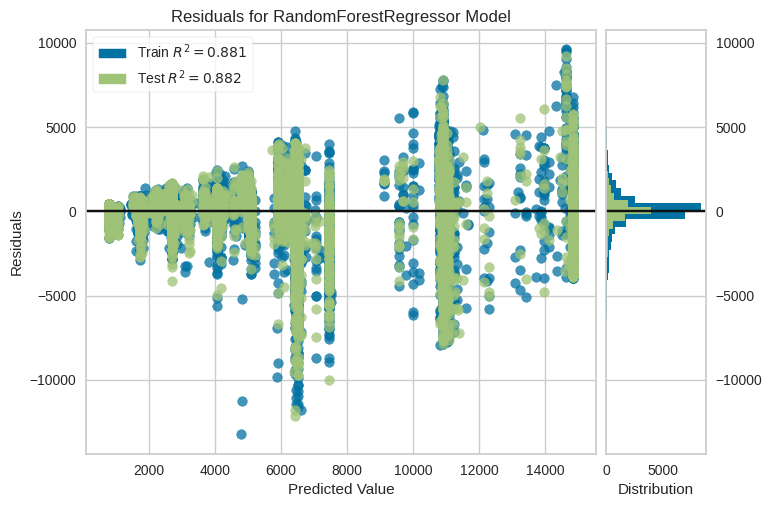

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico- Plot dos resíduos
plot_model(regression_rf_model, plot = 'residuals')

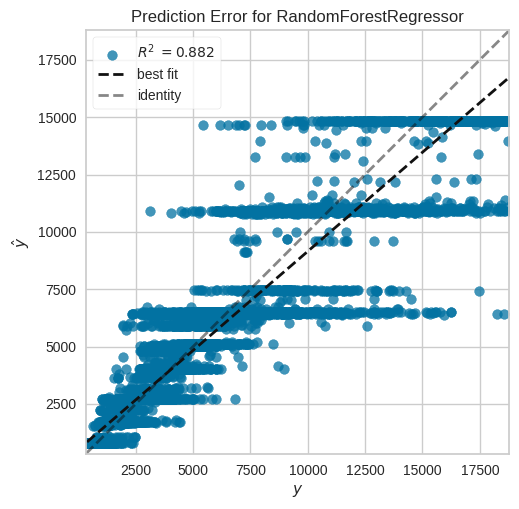

In [ ]:
# <> -------------------------------------------
# <> plot do erro
plot_model(regression_rf_model, plot = 'error')

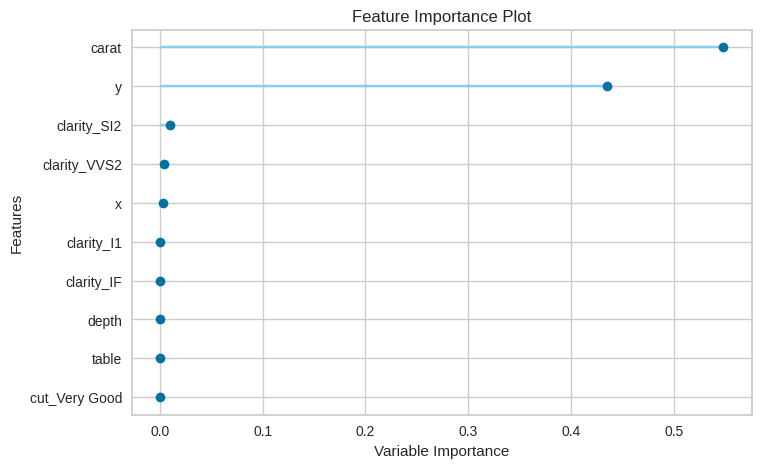

In [ ]:
# <> -------------------------------------------
# <> plot da importância das variáveis
plot_model(regression_rf_model, plot = 'feature')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rt_testing_pred = predict_model(regression_rf_model, data = diamond_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,783.1690,1879666.0575,1371.0091,0.8823,0.2700,0.2258


In [ ]:
# <> -----------------------------------
# <> Olhando um head da predição
rt_testing_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction_label
32685,0.31,Premium,G,VS1,63.000000,57.0,4.32,4.28,2.71,802,788.407120
36258,0.46,Ideal,E,SI2,61.299999,55.0,4.98,5.00,3.06,935,1013.114393
14429,1.21,Very Good,H,SI1,62.400002,58.0,6.83,6.79,4.25,5826,6448.096653
36250,0.41,Ideal,E,VS2,62.099998,57.0,4.74,4.79,2.96,935,788.407120
460,0.90,Ideal,J,VS2,62.799999,55.0,6.20,6.16,3.88,2817,4041.104771


### Processo demorado para Fazer o Tunning da Floresta Aleatória para regressão

In [ ]:
# <> -----------------------------
# <> Otimizar o modelo
tuned_dt = tune_model(regression_rf_model, n_iter = 2, optimize = 'MSE' )

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:12:44
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
# <> -----------------------------
# <> Visualizando o modelo
print(tuned_dt)

DecisionTreeRegressor(max_depth=16, max_features=1.0,
                      min_impurity_decrease=0.001, min_samples_leaf=3,
                      random_state=12345)


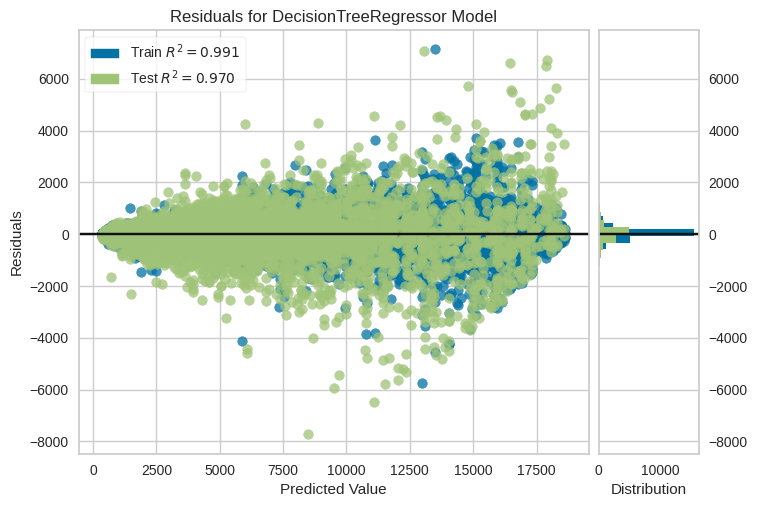

In [ ]:
# <> -------------------------------------------
# <> Visualizando em forma de Gráfico- Plot dos resíduos
plot_model(tuned_dt, plot = 'residuals')

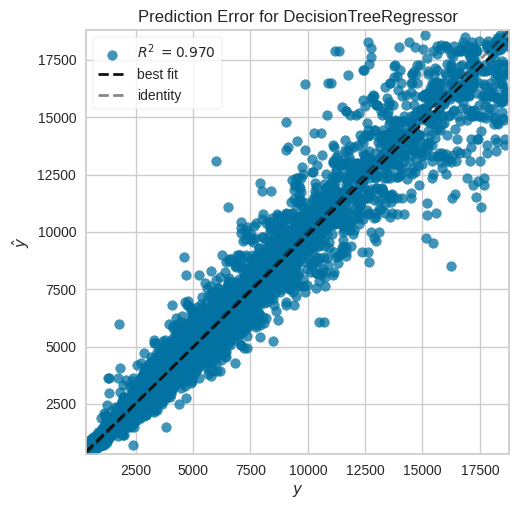

In [ ]:
# <> -------------------------------------------
# <> plot do erro
plot_model(tuned_dt, plot = 'error')

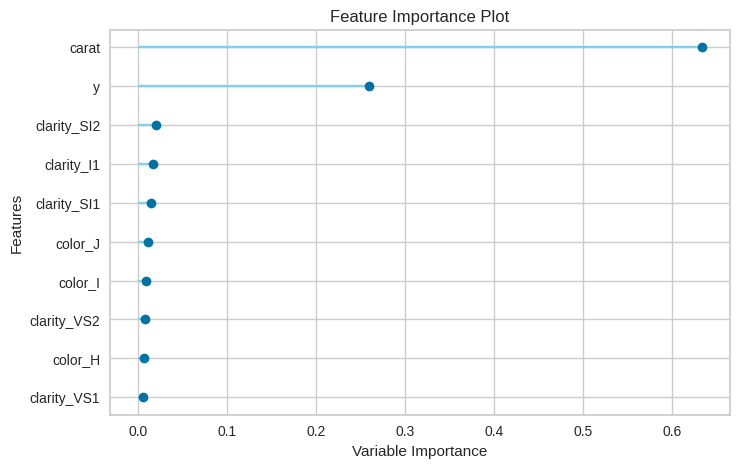

In [ ]:
# <> -------------------------------------------
# <> plot da importância das variáveis
plot_model(tuned_dt, plot = 'feature')

In [ ]:
# <> -----------------------------------
# <> Fazendo predição do modelo
rt_testing_pred = predict_model(tuned_dt, data = diamond_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,340.1051,454231.5360,673.9670,0.9716,0.1197,0.0878
